In [17]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3, style='whitegrid', palette='Set2')
%matplotlib inline

from copy import deepcopy
from tqdm import tqdm

In [18]:
def make_hist_plot(from_filename, to_filename, xlabel, ylabel, title, sep=','):
    with open(from_filename) as f:
        data = ''.join(f.readlines())
    data = data.split(',')
    data = [float(x) for x in data]
    fig = plt.figure(figsize=(12, 8))
    plt.hist(data, bins=20, density=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    fig.savefig(to_filename)

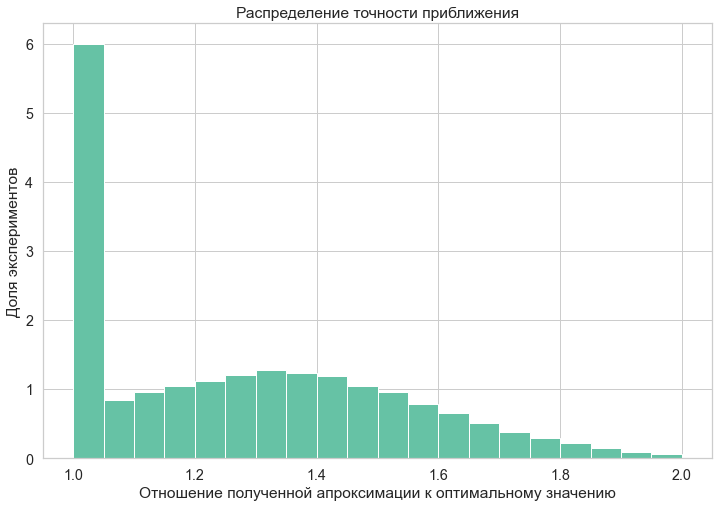

In [19]:
make_hist_plot('results/diffs.txt', 'plots/diffs.png', 'Отношение полученной апроксимации к оптимальному значению',
               'Доля экспериментов', 'Распределение точности приближения')